In [ ]:
# Author: Md Junayed Hasan
# The goal is to further process the data based on real experimental observation and
# subject matter expertise (SME) based cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# No object data
# Load the  CSV file again for modifications
emptypool = pd.read_csv('C:/Users/JH11272/Desktop/GitArch/Ping360-Capture-analysis-and-AI/Processed Data after Record/2024-03-13 15-50-16Gain_0_Results.csv')
non_emptypool = pd.read_csv('Object - Data Demo.csv')

In [3]:
# Subject matter expert based data processing (Notebook 01 knowledge)
# Define the column index up to which to set values to zero -- based on the above explanation
user_defined_index_low = 180  
user_defined_index_high = 830

# Set all values to zero up to the specified index in all rows, excluding the angle column
emptypool.iloc[:, 1:user_defined_index_low+1] = 0
emptypool.iloc[:, user_defined_index_high+1:] = 0

non_emptypool.iloc[:, 1:user_defined_index_low+1] = 0
non_emptypool.iloc[:, user_defined_index_high+1:] = 0

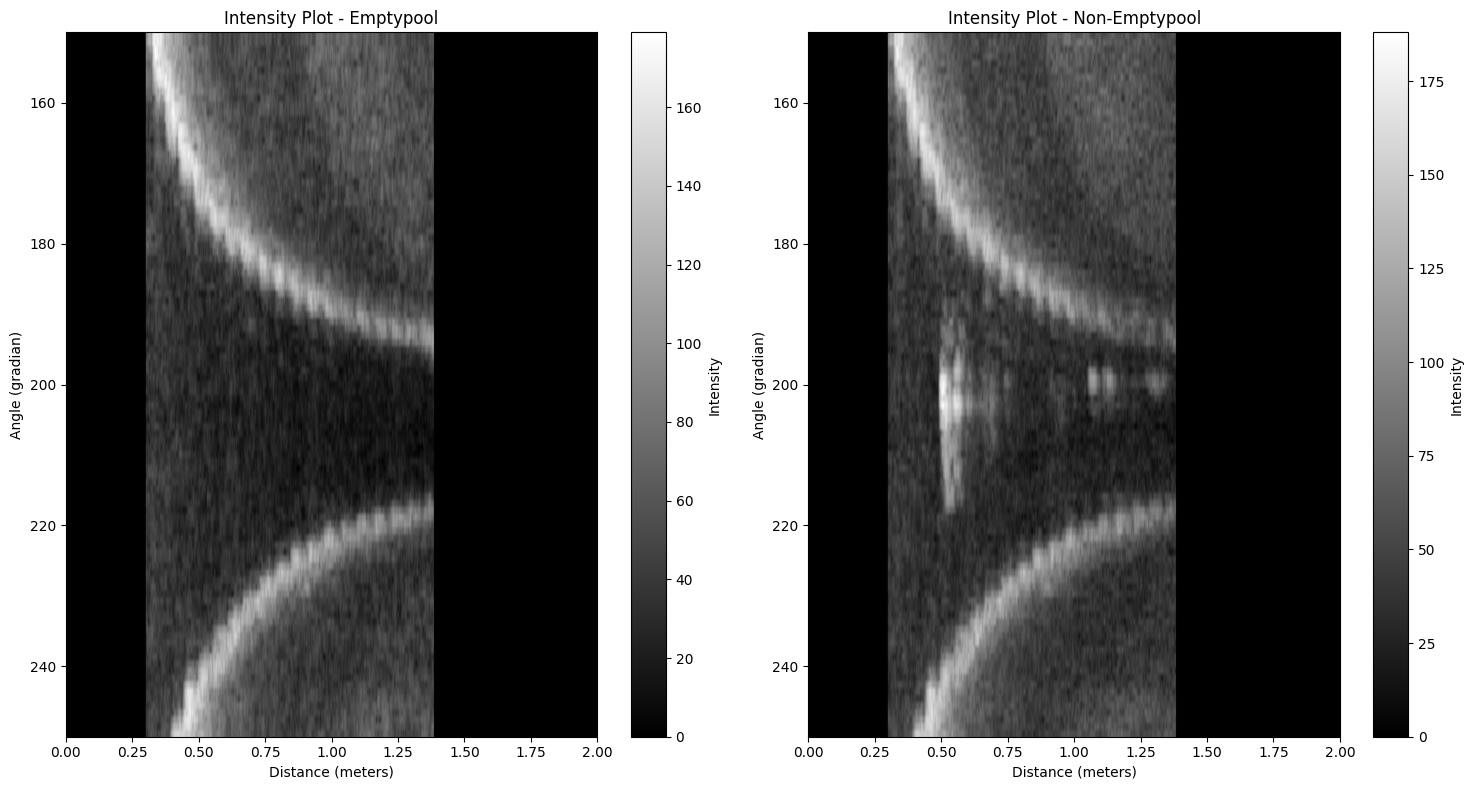

In [4]:
# Plot these
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plotting the emptypool
im1 = ax1.imshow(emptypool.drop(columns=['Angle (gradian)']),
                 aspect='auto',
                 cmap='gray',
                 extent=[0, 2, emptypool['Angle (gradian)'].max(), emptypool['Angle (gradian)'].min()])
ax1.set_title('Intensity Plot - Emptypool')
ax1.set_xlabel('Distance (meters)')
ax1.set_ylabel('Angle (gradian)')
fig.colorbar(im1, ax=ax1, orientation='vertical', label='Intensity')

# Plotting the non_emptypool
im2 = ax2.imshow(non_emptypool.drop(columns=['Angle (gradian)']),
                 aspect='auto',
                 cmap='gray',
                 extent=[0, 2, non_emptypool['Angle (gradian)'].max(), non_emptypool['Angle (gradian)'].min()])
ax2.set_title('Intensity Plot - Non-Emptypool')
ax2.set_xlabel('Distance (meters)')
ax2.set_ylabel('Angle (gradian)')
fig.colorbar(im2, ax=ax2, orientation='vertical', label='Intensity')

# Display the plots
plt.tight_layout()
plt.show()

In [5]:
# Region of Interest (ROI) generation
# Here, we are creating a new data matrix, to plot and further analyse
ROI_emptypool = emptypool.iloc[:, 181:830]
ROI_non_emptypool = non_emptypool.iloc[:, 181:830]


# make it numpy arrays
REN = ROI_emptypool.to_numpy()
RNEN = ROI_non_emptypool.to_numpy()

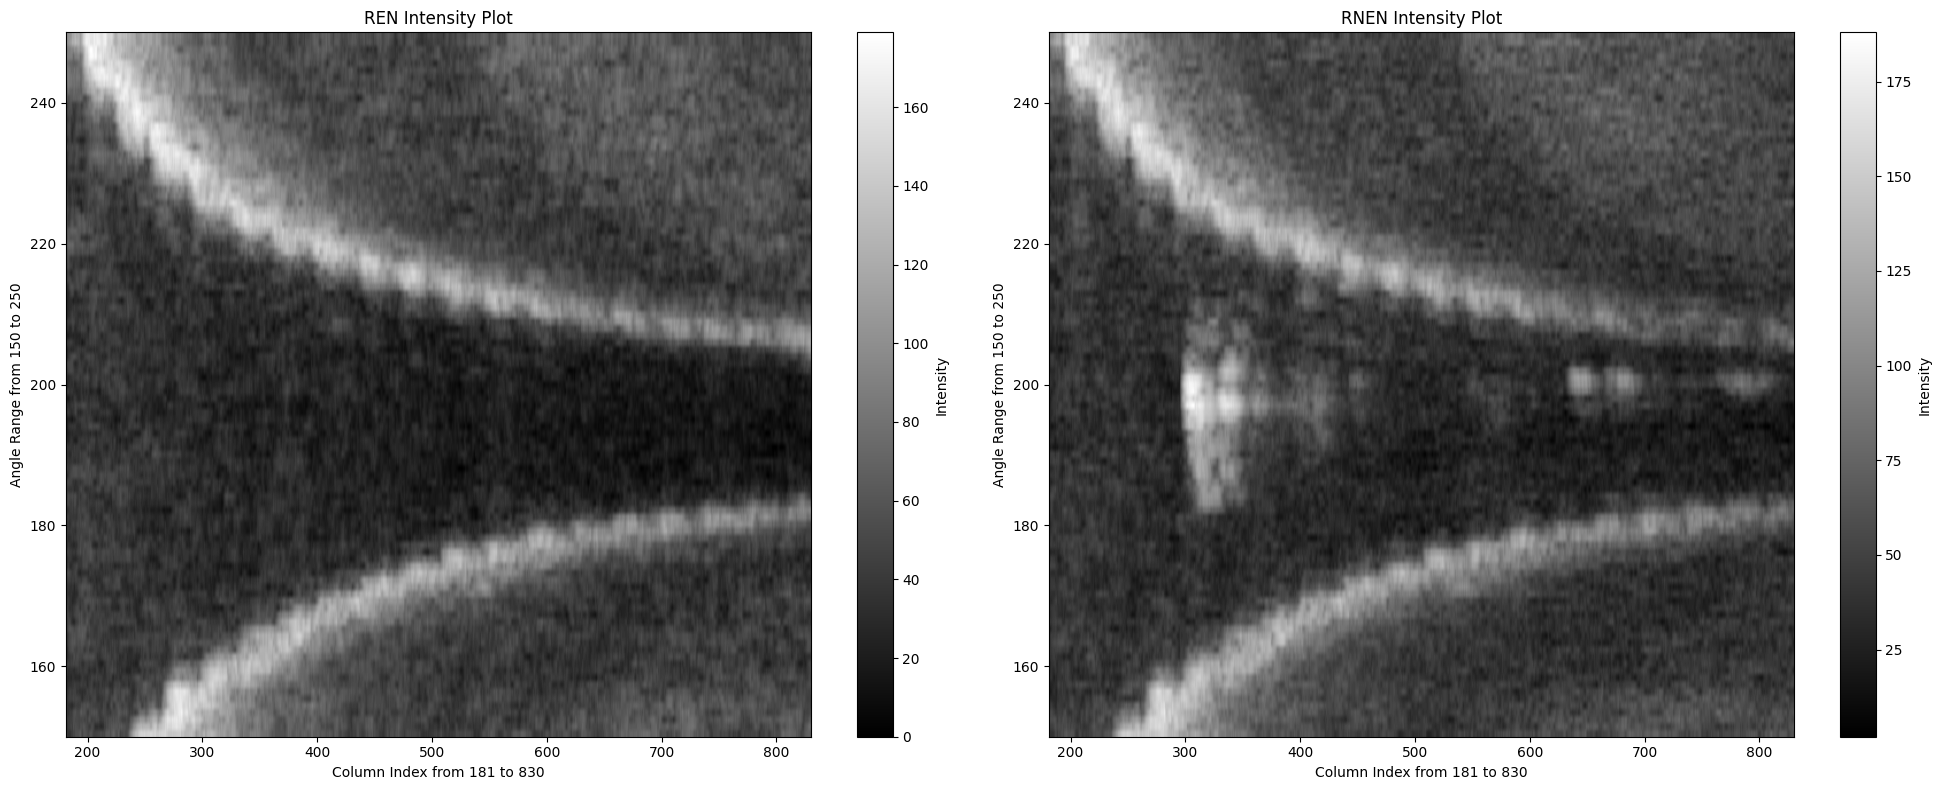

In [6]:
# Note: you can understand how many angles are there from the data,
# please check and adjust. For our case, its 150 to 250



fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first matrix (REN)
im1 = axs[0].imshow(REN, aspect='auto', cmap='gray',
                    extent=[181, 830, 150, 250])
axs[0].set_title('REN Intensity Plot')
axs[0].set_xlabel('Column Index from 181 to 830')
axs[0].set_ylabel('Angle Range from 150 to 250')
fig.colorbar(im1, ax=axs[0], orientation='vertical', label='Intensity')

# Plot the second matrix (RNEN)
im2 = axs[1].imshow(RNEN, aspect='auto', cmap='gray',
                    extent=[181, 830, 150, 250])
axs[1].set_title('RNEN Intensity Plot')
axs[1].set_xlabel('Column Index from 181 to 830')
axs[1].set_ylabel('Angle Range from 150 to 250')
fig.colorbar(im2, ax=axs[1], orientation='vertical', label='Intensity')

plt.tight_layout()
plt.show()


In [ ]:
# Visual inspection is done. We can clearly see, when object appras the 
# frequency of intensity values jumps

Feature dictionary with visual inspection

        Mean     StdDev  +1 StdDev  -1 StdDev   +2 StdDev  -2 StdDev  \
0  50.584418  29.016388  79.600806  21.568030  108.617194  -7.448359   
1  55.150407  28.071515  83.221921  27.078892  111.293436  -0.992623   

    +3 StdDev  -3 StdDev        RMS  
0  137.633582 -36.464747  58.315814  
1  139.364951 -29.064138  61.883579  


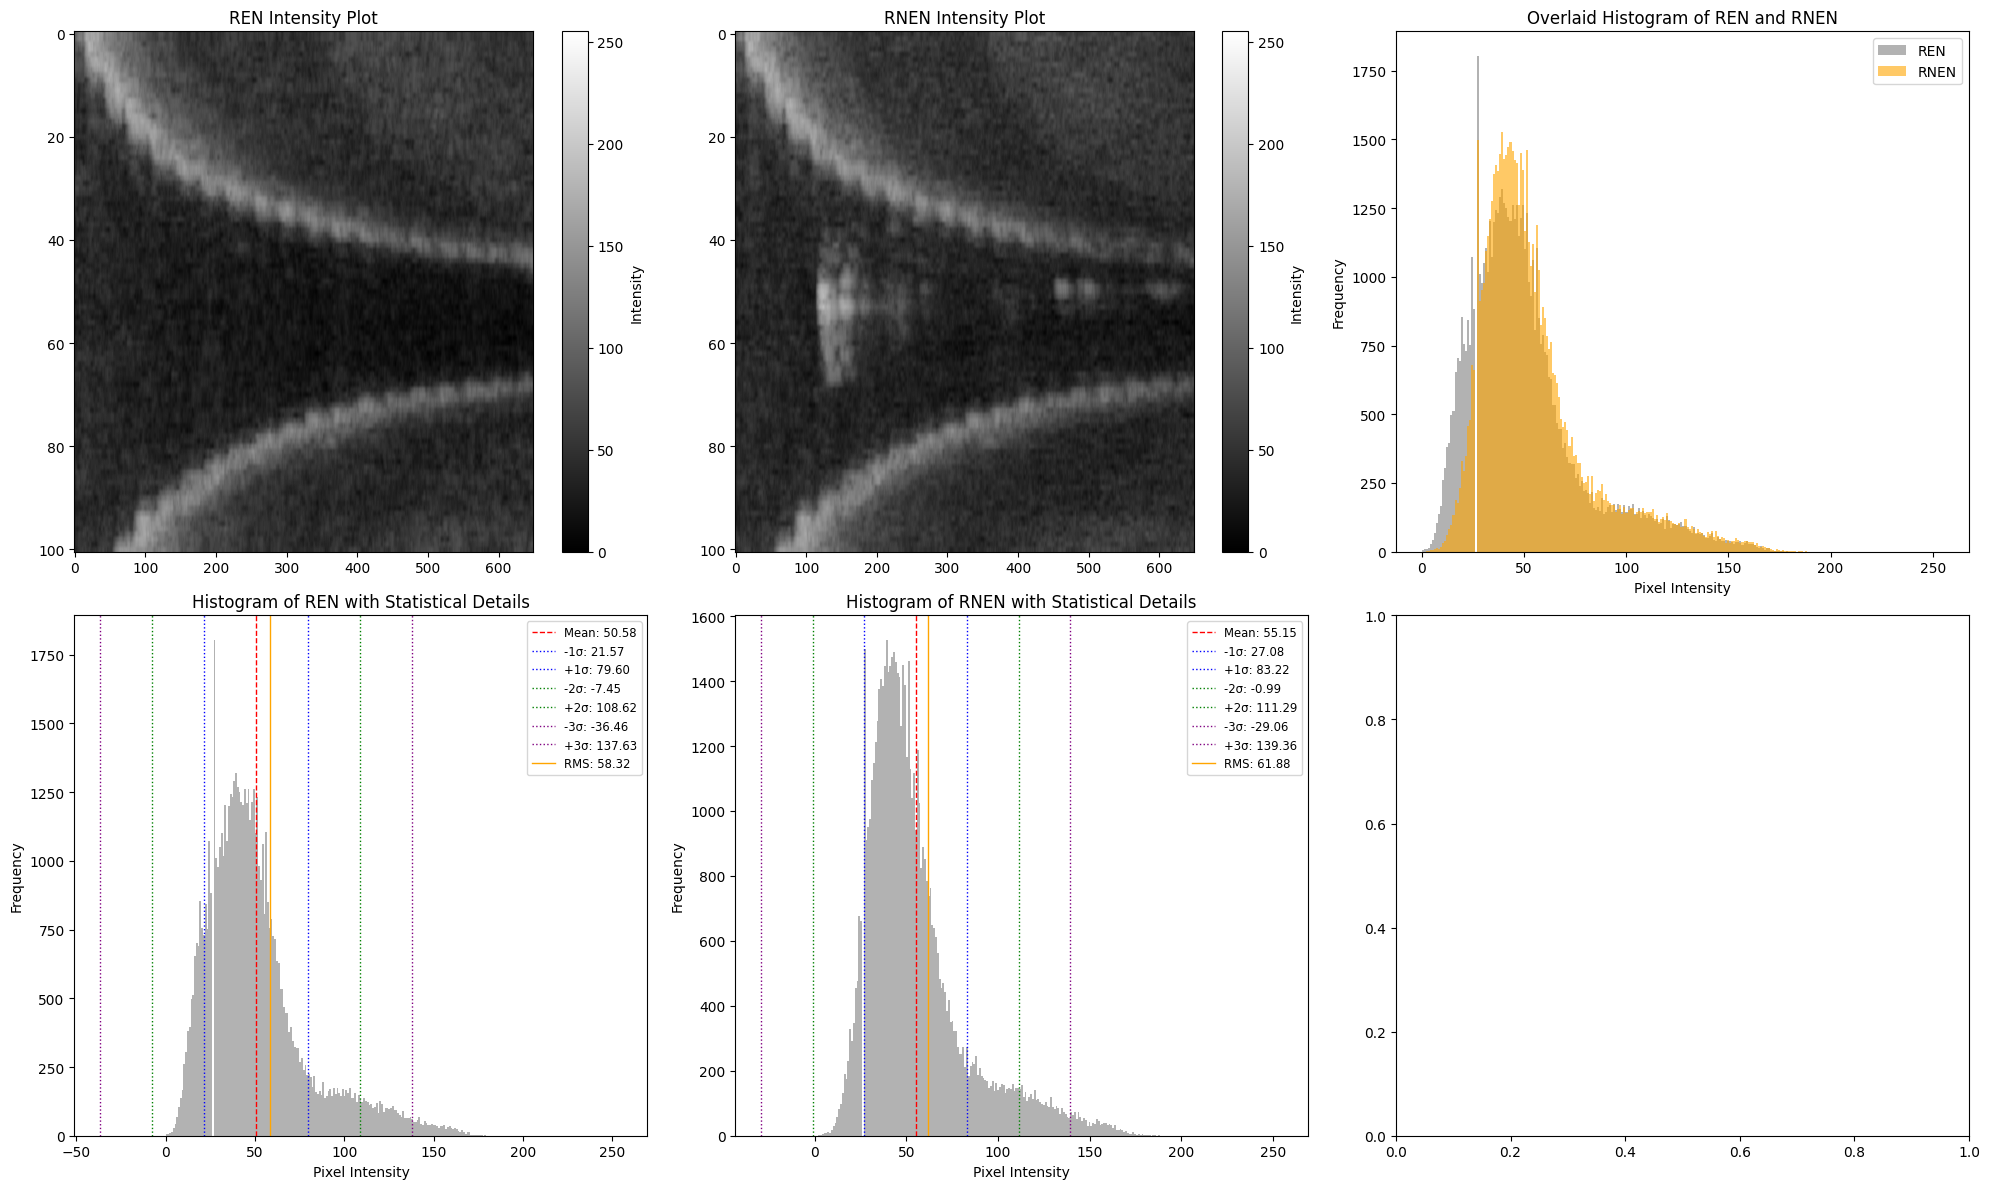

In [13]:

# Function to calculate features for an array
def calculate_features(data, name):
    data_flat = data.flatten()
    mean = np.mean(data_flat)
    std = np.std(data_flat)
    rms = np.sqrt(np.mean(np.square(data_flat)))
    
    features = {
        'Mean': float(mean),
        'StdDev': float(std),
        '+1 StdDev': float(mean + std),
        '-1 StdDev': float(mean - std),
        '+2 StdDev': float(mean + 2 * std),
        '-2 StdDev': float(mean - 2 * std),
        '+3 StdDev': float(mean + 3 * std),
        '-3 StdDev': float(mean - 3 * std),
        'RMS': float(rms)
    }
    return features

# Calculate features for REN and RNEN
REN_features = calculate_features(REN, 'REN')
RNEN_features = calculate_features(RNEN, 'RNEN')

# Store them in a DataFrame
features_df = pd.DataFrame([REN_features, RNEN_features])

# Print the DataFrame
print(features_df)

# Function to plot a histogram with statistical details
def plot_histogram_with_stats(ax, data, title, features):
    data_flat = data.flatten()
    ax.hist(data_flat, bins=256, range=(0, 255), color='gray', alpha=0.6)
    mean = features['Mean']
    std = features['StdDev']
    rms = features['RMS']

    # Plot mean, standard deviations, and RMS
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    ax.axvline(mean - std, color='blue', linestyle='dotted', linewidth=1, label=f'-1σ: {(mean - std):.2f}')
    ax.axvline(mean + std, color='blue', linestyle='dotted', linewidth=1, label=f'+1σ: {(mean + std):.2f}')
    ax.axvline(mean - 2 * std, color='green', linestyle='dotted', linewidth=1, label=f'-2σ: {(mean - 2 * std):.2f}')
    ax.axvline(mean + 2 * std, color='green', linestyle='dotted', linewidth=1, label=f'+2σ: {(mean + 2 * std):.2f}')
    ax.axvline(mean - 3 * std, color='purple', linestyle='dotted', linewidth=1, label=f'-3σ: {(mean - 3 * std):.2f}')
    ax.axvline(mean + 3 * std, color='purple', linestyle='dotted', linewidth=1, label=f'+3σ: {(mean + 3 * std):.2f}')
    ax.axvline(rms, color='orange', linestyle='solid', linewidth=1, label=f'RMS: {rms:.2f}')

    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right', fontsize='small')

# Create subplots for REN and RNEN images and their histograms
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Plot the first image (REN)
im1 = axs[0, 0].imshow(REN, aspect='auto', cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('REN Intensity Plot')
fig.colorbar(im1, ax=axs[0, 0], orientation='vertical', label='Intensity')

# Plot the second image (RNEN)
im2 = axs[0, 1].imshow(RNEN, aspect='auto', cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_title('RNEN Intensity Plot')
fig.colorbar(im2, ax=axs[0, 1], orientation='vertical', label='Intensity')

# Overlay histograms of REN and RNEN
axs[0, 2].hist(REN.flatten(), bins=256, range=(0, 255), color='gray', alpha=0.6, label='REN')
axs[0, 2].hist(RNEN.flatten(), bins=256, range=(0, 255), color='orange', alpha=0.6, label='RNEN')
axs[0, 2].set_title('Overlaid Histogram of REN and RNEN')
axs[0, 2].set_xlabel('Pixel Intensity')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].legend(loc='upper right')

# Plot histogram of REN with statistical details
plot_histogram_with_stats(axs[1, 0], REN, 'Histogram of REN with Statistical Details', REN_features)

# Plot histogram of RNEN with statistical details
plot_histogram_with_stats(axs[1, 1], RNEN, 'Histogram of RNEN with Statistical Details', RNEN_features)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


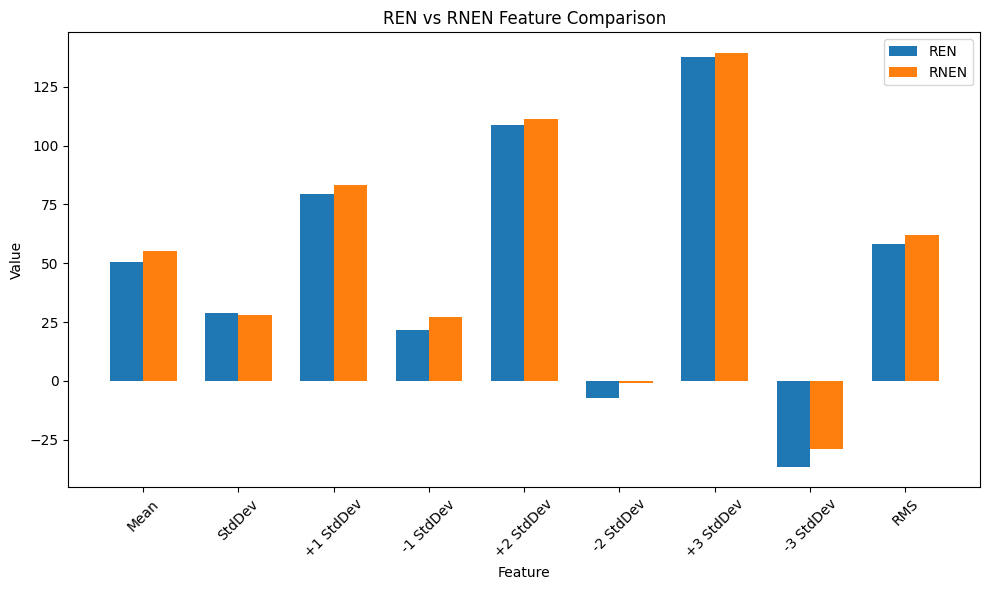

In [14]:
# Statistical feature comparisons
# Create a bar plot to compare the features
feature_names = list(REN_features.keys())
REN_values = [REN_features[name] for name in feature_names]
RNEN_values = [RNEN_features[name] for name in feature_names]

# Plotting the feature comparison between REN and RNEN
bar_width = 0.35
indices = np.arange(len(feature_names))

plt.figure(figsize=(10, 6))
plt.bar(indices - bar_width / 2, REN_values, width=bar_width, label='REN', align='center')
plt.bar(indices + bar_width / 2, RNEN_values, width=bar_width, label='RNEN', align='center')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('REN vs RNEN Feature Comparison')
plt.xticks(indices, feature_names, rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

           Mean     StdDev  +1 StdDev  -1 StdDev   +2 StdDev  -2 StdDev  \
REN   50.584418  29.016388  79.600806  21.568030  108.617194        0.0   
RNEN  55.150407  28.071515  83.221921  27.078892  111.293436        0.0   

       +3 StdDev  -3 StdDev        RMS  
REN   137.633582        0.0  58.315814  
RNEN  139.364951        0.0  61.883579  

The two features with the most difference between REN and RNEN are:
-1 StdDev: 5.51
Mean: 4.57


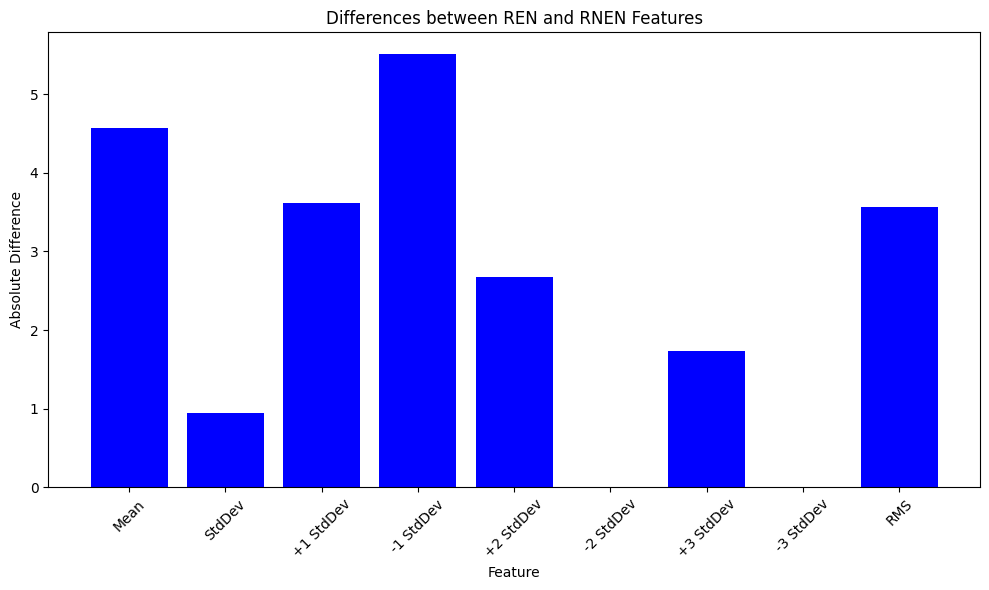

In [16]:
# Our data values ranges in positive range, therefore, if we calculate the negative 3 std or 2 std negative,
# it is not reasoanble. may be for visualzation is okay, but we need to be careful 
# while selecting the threshold. 
# lets analyse

# Explanation:
# Adjusted Features:
# Negative standard deviation markers are clamped to zero.
# Positive markers are clamped to a maximum of 255.
# Interpretation:
# The bar plot now compares all features with meaningful values.
# The two features with the most significant differences are printed clearly.



# Function to calculate features for an array
def calculate_features(data, name):
    data_flat = data.flatten()
    mean = np.mean(data_flat)
    std = np.std(data_flat)
    rms = np.sqrt(np.mean(np.square(data_flat)))
    
    features = {
        'Mean': float(mean),
        'StdDev': float(std),
        '+1 StdDev': float(min(mean + std, 255)),
        '-1 StdDev': float(max(mean - std, 0)),
        '+2 StdDev': float(min(mean + 2 * std, 255)),
        '-2 StdDev': float(max(mean - 2 * std, 0)),
        '+3 StdDev': float(min(mean + 3 * std, 255)),
        '-3 StdDev': float(max(mean - 3 * std, 0)),
        'RMS': float(rms)
    }
    return features

# Calculate features for REN and RNEN
REN_features = calculate_features(REN, 'REN')
RNEN_features = calculate_features(RNEN, 'RNEN')

# Store them in a DataFrame
features_df = pd.DataFrame([REN_features, RNEN_features], index=['REN', 'RNEN'])
print(features_df)

# Calculate differences between the two sets of features
differences = {key: abs(REN_features[key] - RNEN_features[key]) for key in REN_features}

# Find the two features with the largest differences
sorted_differences = sorted(differences.items(), key=lambda x: x[1], reverse=True)
most_diff_features = sorted_differences[:2]

print("\nThe two features with the most difference between REN and RNEN are:")
for feature, diff in most_diff_features:
    print(f"{feature}: {diff:.2f}")

# Create a bar plot to visualize the differences
feature_names = list(differences.keys())
difference_values = [differences[name] for name in feature_names]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, difference_values, color='blue')
plt.xlabel('Feature')
plt.ylabel('Absolute Difference')
plt.title('Differences between REN and RNEN Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Though RMS or -1 std has more differences, that can be a great indicator to understand if object
appears in the scene or not.
However, for denoising, the ideal choice is +3std or +2std

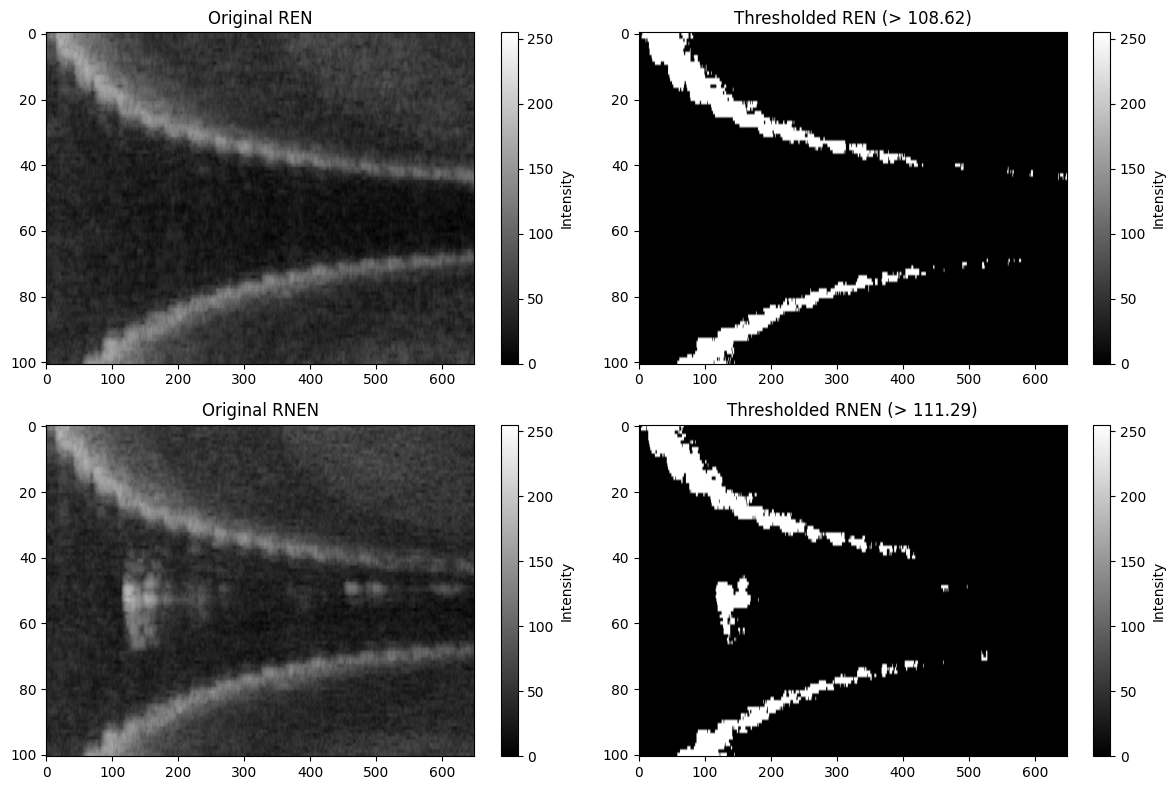

In [18]:
# Define the thresholds based on +2 StdDev
REN_threshold_value = REN_features['+2 StdDev']
RNEN_threshold_value = RNEN_features['+2 StdDev']

# Threshold the original arrays
REN_thresholded = (REN > REN_threshold_value).astype(np.uint8) * 255
RNEN_thresholded = (RNEN > RNEN_threshold_value).astype(np.uint8) * 255

# Plot the original and thresholded images side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original REN
im1 = axs[0, 0].imshow(REN, aspect='auto', cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('Original REN')
fig.colorbar(im1, ax=axs[0, 0], orientation='vertical', label='Intensity')

# Thresholded REN
im2 = axs[0, 1].imshow(REN_thresholded, aspect='auto', cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_title(f'Thresholded REN (> {REN_threshold_value:.2f})')
fig.colorbar(im2, ax=axs[0, 1], orientation='vertical', label='Intensity')

# Original RNEN
im3 = axs[1, 0].imshow(RNEN, aspect='auto', cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title('Original RNEN')
fig.colorbar(im3, ax=axs[1, 0], orientation='vertical', label='Intensity')

# Thresholded RNEN
im4 = axs[1, 1].imshow(RNEN_thresholded, aspect='auto', cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_title(f'Thresholded RNEN (> {RNEN_threshold_value:.2f})')
fig.colorbar(im4, ax=axs[1, 1], orientation='vertical', label='Intensity')

plt.tight_layout()
plt.show()

Now lets do the final thresholding, where we apply SME + data analysis threhsolding
and clean the data, preprocess it and plot.
Check notebook 03.
